# Ensemble Methods

## Ensembles of Decision Trees
Ensemble is just combination of ML models. Two notable ones are random forests and gradient boosted decision trees

### Random forests
- Decision trees tend to overfit so random forests can solve the problem
- Random forest is collection of decision trees where each tree is overfitted in different ways. 
- 2 ways the randomness comes
    1. different data points
    2. selecting features in each split test

#### Building random forests
1. Take bootstrap sample of data. Ex. bootstrap of ['a', 'b', 'c'] could be ['b', 'b', 'c']
2. build decision tree on the bootsrap based on random subset of features. These 2 mechanisms make sure the trees are different. 
3. low max_features == very different trees. high max_features == similar trees
4. the algorithm makes prediction for every tree and then average all the probabilities. this is "soft" prediction. highest probability is then taken. 

In [8]:
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

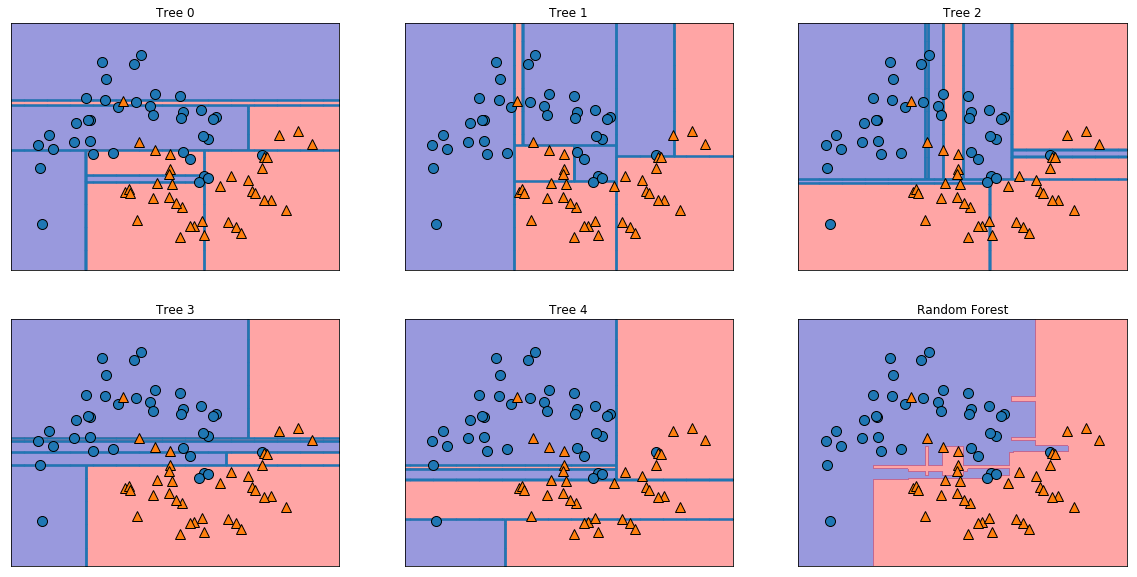

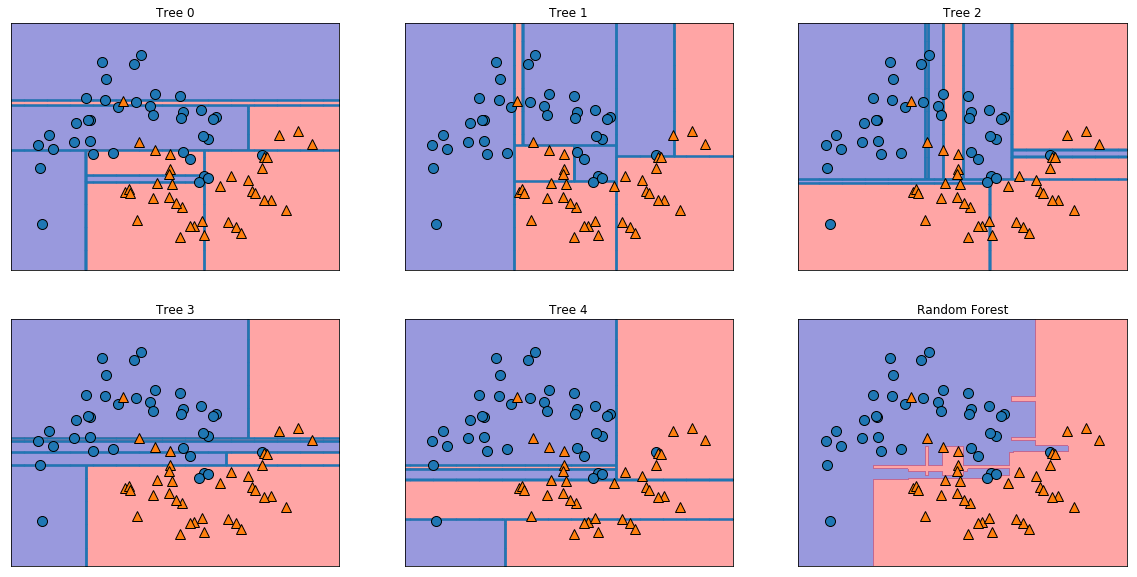

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
         alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.972


random forests gives accuracy of 97% which is better than the linear models or a single decision tree, without tuning any parameters

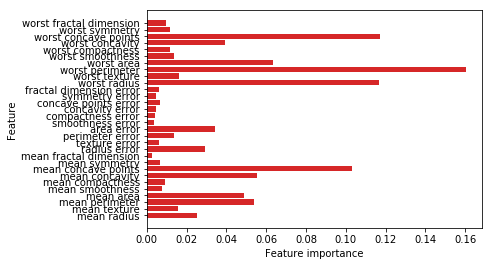

In [20]:
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
plot_feature_importances_cancer(forest)

As you can see, the random forest gives nonzero importance to many more features
than the single tree. Similarly to the single decision tree, the random forest also gives
a lot of importance to the “worst radius” feature, but it actually chooses “worst perim‐
eter” to be the most informative feature overall. The randomness in building the ran‐
dom forest forces the algorithm to consider many possible explanations, the result
being that the random forest captures a much broader picture of the data than a sin‐
gle tree.

_Strengths_
    - better than decision tree at everything. one reason to still use decision trees if you need a compact representation of decision-making process since u can't interpret hundreds of features. 
    - you can parallelize building decision tree across multiple CPU cores with the n_jobs parameter. -1 to use all cores
    - more trees == more robust
    
_Weaknesses_
    - Random forests don’t tend to perform well on very high dimensional, sparse data, such as text data
    - Linear models more appropriate. 
    
_Parameters_
    - important to fix randomstate to have reproducible results. 
    - The important parameters to adjust are n_estimators, max_features, and possibly pre-pruning options like max_depth.
    - for n_estimators, larger is better

### Gradient Boosted regression trees

- can be used for regression and classification
- each tree tries to correct the mistakes of the previous one
- no randomization by default just using pre-pruning
- Often shallow trees, depth 1 to 5
- main idea is to combine many simple models (weak learners) like shallow trees. 
- trees are added iteratively to improve performance
- bit more sensitive to parameter settings than random forests but can provide better accuracy if the parameters are set correctly
- another important parameter of gradient boosting is the learning_rate, which controls how strongly each tree tries to correct the mistakes of the previous trees. 
- adding more trees by adding mroe to n_estimators increases model complexity

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.958


clearly, 100% training accuracy is indicative of overfitting so we apply stronger pre-pruning by limiting the maximum depth or lower the learning rate

In [23]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [24]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.965


Both methods above decrease the model complexity. Lowering tree depth did better than lowering learning rate. 

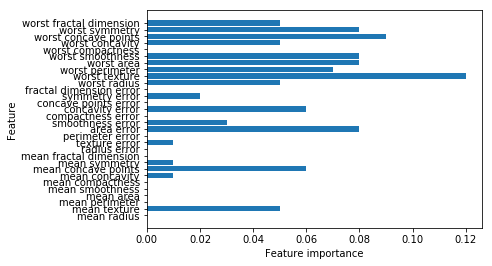

In [26]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

if random forests work well but prediction time is at premium, to get last bit of accuracy from machine learning model, moving to gradient boosting often helps

_Strengths_
- Just like other tree-based models, the algorithm works well without scaling and on a mixture of binary and continuous features
- just like other tree-based modeks, it doesn't work well on high-dimensional sparse data

_Weaknesses_
- require careful tuning and takes long time to train

_Parameters_
- main parameters are n_estimators and learning_rate
- they are highly interconnected as lower learning rate means more trees are needed to build a model of similar complexity 
- in random forests, a higher n_estimator is always better
- in gradient boosting, higher n_estimators may lead to overfitting since it is more complex model
- common practice is to fit n_estimators depending on the time and memory budget and then search over different learning_rates
- another parameter is max_depth to reduce complexity of each tree. often set 1-5. 